<img src="https://drive.google.com/uc?export=view&id=10mKgunAZowpvpttdYdjoDeCM2RSMGXer" width="100%">

In [1]:
pip install kaggle

In [2]:
import os
from google.colab import files

# Subir el archivo kaggle.json
uploaded = files.upload()

# Crear el directorio .kaggle y mover el archivo
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip heart-failure-clinical-data.zip
import pandas as pd
df_insuficiencia_cardiaca = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 8.89MB/s]
Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


# **Resumen Calidad de Datos**
---

Este notebook realiza a través de google colaboratory el resumen de calidad de datos para el proyecto Predicción Insuficiencia Cardiaca Utilizando Técnicas de Machine Learning.

Esta desarrollado por:

- Henry Hernán Bolaños Bravo
- Wilson Ricardo Torres Morales

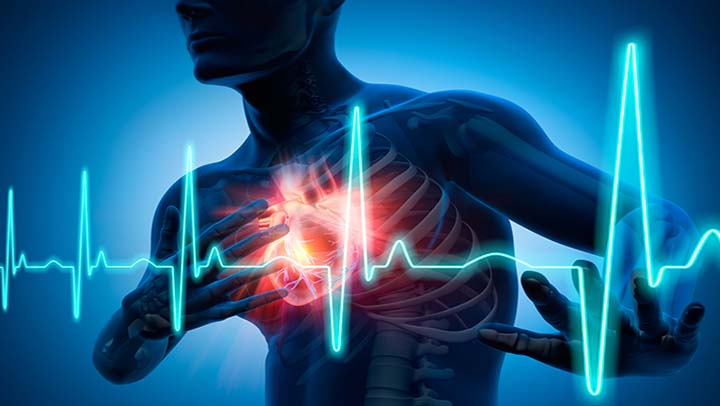

## **1. Datos Faltantes**
---

A continuación se realiza la identificación de datos faltantes de insuficiencia cardiaca. Los resultados muestran que no hay datos faltantes para los campos del dataset.


In [3]:
def datos_faltantes(df):
  # Se revisa si hay valores faltantes en el DataFrame
  print(df.isnull().sum())

datos_faltantes(df_insuficiencia_cardiaca)


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


## **2. Documentos Ilegibles Duplicidad de datos**
---

A continuación se realiza la identicacion de documentos ilegibles de datos correspondiente a duplicidad de datos de insuficiencia cardiaca.

Se evidencia que no hay duplicados en los datos.

In [4]:
# Comprobar duplicados
def duplicados(df):
  duplicados = df.duplicated().sum()
  print("Número de registros duplicados:", duplicados)

duplicados(df_insuficiencia_cardiaca)

Número de registros duplicados: 0


## **2. Documentos Ilegibles Tipos Datos Incorrectos**
---

A continuación se realiza la identicacion de documentos ilegibles de datos correspondiente a datos incorrectos de insuficiencia cardiaca.

Se evidencia que no hay tipos incorrectos de datos de acuerdo al resultado de la función.


In [5]:
def tipos_incorrectos(df):

  # Verificar tipos de datos
  print("Tipos de datos:\n", df.dtypes)

  # Comprobar si hay datos que no corresponden al tipo esperado (por ejemplo, si se espera un número y hay cadenas)
  for col in df.columns:
     if df[col].dtype == 'object':  # Si la columna es de tipo objeto (string)
        # Comprobar si hay valores que no son convertibles a numérico
        try:
            df[col].astype(float)
        except ValueError:
            print(f"Columna '{col}' contiene datos ilegibles.")

tipos_incorrectos(df_insuficiencia_cardiaca)


Tipos de datos:
 age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


## **4. Mezcla de Formatos**
---

A continuación se realiza la identificación de campos que tengan diferentes tipos de formato en su campo de datos de insuficiencia cardiaca.

De acuerdo a la función se determina que no hay campos que tengan mezclas de diferentes formatos.


In [7]:
def mezcla_formatos(df):
   for col in df.columns:
      # Obtener tipos únicos en la columna
      tipos_unicos = df[col].apply(type).unique()

      # Si hay más de un tipo, se considera que hay mezcla de formatos
      if len(tipos_unicos) > 1:
          print(f"\nColumna: {col}")
          print("Tipos únicos en la columna:", tipos_unicos)
          print(f"-> La columna '{col}' tiene mezcla de formatos.")
      else:
          print(f"-> La columna '{col}' no tiene mezcla de formatos.")

mezcla_formatos(df_insuficiencia_cardiaca)

-> La columna 'age' no tiene mezcla de formatos.
-> La columna 'anaemia' no tiene mezcla de formatos.
-> La columna 'creatinine_phosphokinase' no tiene mezcla de formatos.
-> La columna 'diabetes' no tiene mezcla de formatos.
-> La columna 'ejection_fraction' no tiene mezcla de formatos.
-> La columna 'high_blood_pressure' no tiene mezcla de formatos.
-> La columna 'platelets' no tiene mezcla de formatos.
-> La columna 'serum_creatinine' no tiene mezcla de formatos.
-> La columna 'serum_sodium' no tiene mezcla de formatos.
-> La columna 'sex' no tiene mezcla de formatos.
-> La columna 'smoking' no tiene mezcla de formatos.
-> La columna 'time' no tiene mezcla de formatos.
-> La columna 'DEATH_EVENT' no tiene mezcla de formatos.


## Créditos
---

**Profesor**

- [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/)

**Asistente docente**:

- [Juan S. Lara MSc](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/)

**Diseño de imágenes:**
- [Brian Chaparro Cetina](mailto:bchaparro@unal.edu.co).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*